In [ ]:
Montecarlo Estimate of Pi 
Computational Physics Lab

In [2]:
# import statements
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['figure.figsize'] = 10, 10
import math as m   # importing math library outside function definition saves time 
import numpy as np
import matplotlib.patches as patches

3.04


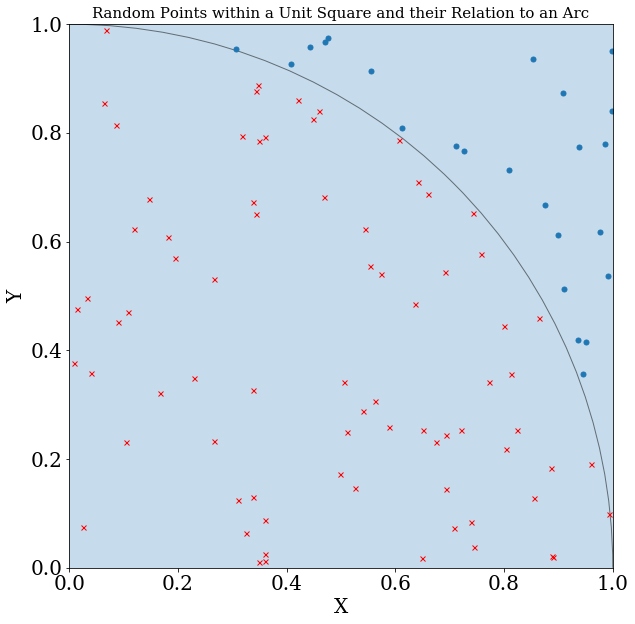

As you can tell, with only 100 random points pi is not very accurate.


In [3]:
"""1) Write a function called monteCarloPi(n) that throws n darts at the unit square and returns an estimate of π.

(2) Make an example plot showing a single example of 100 throws at the unit square. 
Color the points appropriately to visually guide the user (also use two differnt symbol shapes). 
"""

def monteCarloPi(n):
    """
    n = number of random points : type=int
    
    This function takes an int, n, and uses that to compute
    n number of random x and y values.
    
    It then uses those x and y values to compute pi from a unit circle within
    the unit square, using sqrt(x^2 + y^2).
    
    This works because np.random.rand gives a list of random numbers between 0 and 1,
    which conviniently are the min/max of the x and y values of the unit square.
    
    The function returns pi, but then also lists of arcx, arcy, sqrx, sqry. 
    These lists are then passed into the next function, which plots the
    points within the arc and the points only within the square
    
    
    n = number of random points"""

   #monteCarloPi
    x,y = np.random.rand(2,n)
    inside=0
    arcx = []
    arcy = []
    sqrx = []
    sqry = []
    for i in range(0,n):
        #x=random()
        #y=random()
        if np.sqrt(x[i]*x[i]+y[i]*y[i])<=1:
            inside+=1
            arcx.append(x[i])
            arcy.append(y[i])
        else:
            sqrx.append(x[i])
            sqry.append(y[i])
    pi=4*inside/n
    return pi, arcx, arcy, sqrx, sqry
    
def fullMonte(arcx,arcy,sqrx,sqry):
    """This function allows the plotting of the arc and unit square,
    and then based on the location of the points changes their symbolization.
    
    arcx = x coords of points within the arc
    arcy = y coords of points within the arc
    
    sqrx = x coords of points within the square, but not within the arc
    sqry = y coords of points within the square, but not within the arc
    
    This function returns nothing, and when called plots all of the above."""
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.add_patch(patches.Rectangle(
            (0, 0),   # (x,y)
            1,          # width
            1,          # height
            alpha=0.25))  # transparency
    
    ax1.add_patch(patches.Arc(
            (0, 0),   # (x,y)
            2,          # width
            2,          # height
            theta1=0.0,
            theta2=90.0,
            alpha=0.5))  # transparency
    
    ax1.axis([0, 1.05, 0, 1.05]) 
    
    plt.plot(arcx, arcy, 'rx', markersize=5)
    plt.plot(sqrx, sqry, 'o', markersize=5)
    
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.title('Random Points within a Unit Square and their Relation to an Arc', size = '15')
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.show()
    
n = 100 #numer of random points you want to plot
pi, arcx, arcy, sqrx, sqry = monteCarloPi(n)
print(pi)
fullMonte(arcx,arcy,sqrx,sqry)

print(f"As you can tell, with only {n} random points pi is not very accurate.")

In [7]:
"""
(3) Plot this estimate of π as a function of n in the range
[100, 1,000,000, 1,000] with the horizontal axis plotted logarithmically. """

x = []
y = []
for i in range(100,1000000, 1000):
    """This loop runs in a range from 100 to 1,000,001.
    each i in the loop is used as the n in our monteCarloPi function, and then and
    x list is appended with the i value, and a y list is appended with the returned pi from the function."""
    pi, arcx, arcy, sqrx, sqry = monteCarloPi(i)
    x.append(i)
    y.append(pi)
    


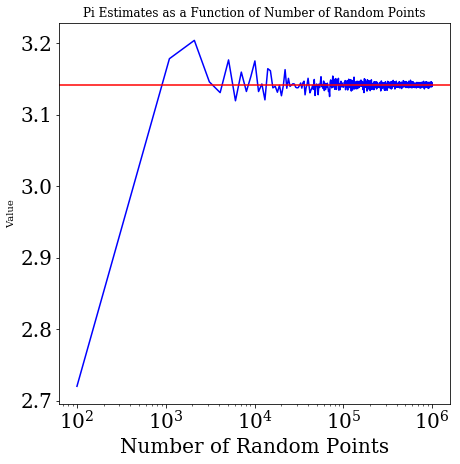

In [8]:
plt.plot(x,y ,'b-', markersize=10)
plt.xscale('log')
plt.ylabel('Value', size = '10')
plt.xlabel('Number of Random Points')
plt.title('Pi Estimates as a Function of Number of Random Points',size=12)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.axhline(y=np.pi, color='r', linestyle='-')
    
    
plt.show()
    

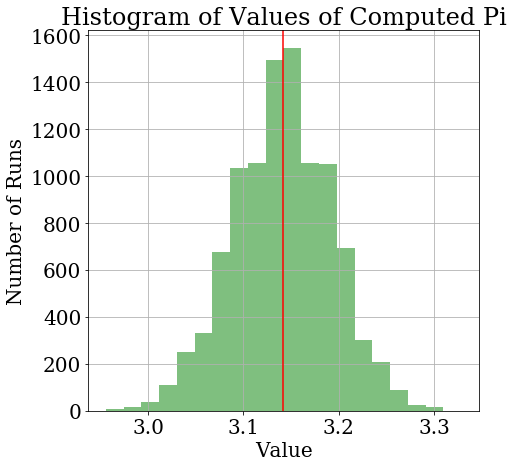

In [9]:
"""4) Write code to throw 1,000 darts at the unit square. Perform this action 10,000 times,
and store each result in an array. Plot a histogram of the values of π obtained. 
What is the mean value? What is the width of the histogram?
In the context of this assignment, what is the significance of the histogram's width? Google is your friend!


Answer:

A histogram is used here to show the frequency of each value of pi. The histogram bars are equally spaced
groupings of values. This grouping size is determing by the amount of bars set, and the average value is shown 
by the highest bar. The accuracy of this value can change drastictly with a decrease or increase of the number of bars used in the
histogram. Here the number of bars is set to 20, showing an average of around 3.14. If the bar numbers were to
1, the accuracy of the histogram average would be reduced to something ridiculous.

A standard deviation is half the height of the tallest middle bar(ignoring huge outliers).
So to change the number of bars would not change the standard deviation.



"""

mistogram = []
for i in range(10000):
    """Similar to the loop in part 3. However, instead of i determining n in the function there is a set
    n = 1,000. This then returns a pi and is used to place the frequency of each occurance through 10000 runs."""
    pi, arcx, arcy, sqrx, sqry = monteCarloPi(1000)
    mistogram.append(pi)
#print(mistogram)

# the histogram of the data
n, bins, patches = plt.hist(mistogram, 20, facecolor='g', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Number of Runs')
plt.title('Histogram of Values of Computed Pi')
plt.grid(True)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.axvline(x=np.pi, color='r', linestyle='-')
    

plt.show()

In [10]:
print(np.mean(mistogram))


3.1409788
